# Settings

In [223]:

import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf
import scipy
# import sys
# sys.path.append("C:/Users/HouseW/LocalPython/SATEST-main/SATEST-main/utils.py")
from utils import FrameExtractor, LPC, ref_derbin, derbin, auto_corr, PlotLPCSpectrum, ThresholdClipper

# plt.rcParams["figure.figsize"] = (5,5)
# plt.rc('font', size=20)
# plt.rc('axes', labelsize=25)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick',labelsize=25)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=50)
# plt.rc('figure', autolayout=True)

sr = 16000
win_time = 0.02
dftlen = 512
# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)
print("Hop Len:",hop_len)

file_path = 'sa0_new.wav'
yr,ori_sr = lr.load(file_path,sr=sr)
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr




Window Len: 320
Hop Len: 160


## Windowing and Overlapping

In [216]:
# ## Overlap Test

# h = lr.filters.get_window(window="hann", Nx=50)
# z = np.zeros_like(h)
# h = np.concatenate([h,z])
# h2 = np.roll(h,25)
# plt.plot(h)
# plt.plot(h2)
# plt.show()

# # h3 = h+h2+np.roll(h2,25)
# h3 = h+h2
# # print(h3)
# plt.plot(h3)
# plt.show()

# ### OLA를 하려면 hamming은 1.08배 scale이 되어야 하는구나!

# Frame Visualization In Total

In [217]:
# ## 0번 frame 부터 5개를 표시해보자
# """ Frame Visualization Between Total """

# ind1 = 0
# ind2 = 30
# fig, axes = plt.subplots(5,1,figsize=(15,20))

# FE = FrameExtractor(yr, win_len=win_len, hop_len=hop_len)
# frame_arr = FE.extract_frames(win_type="hamming")

# time = np.arange(0, len(yr)/sr, 1/sr)
# for i in range(5):
#     startind1 = FE.hop_len * ind1
#     endind1 = FE.hop_len * ind1 + FE.win_len
#     startind2 = FE.hop_len * ind2
#     endind2 = FE.hop_len * ind2 + FE.win_len
#     print("startind:", startind1)
#     frame1 = frame_arr[ind1]
#     frame2 = frame_arr[ind2]
#     ind1 += 1
#     ind2 += 1

#     # 기존 waveform 그리기
#     axes[i].plot(time, yr, label='waveform')
    
#     # 추출된 frame 그리기
#     axes[i].plot(time[startind1: endind1], frame1, label='frame {}'.format(2*i + 1), linestyle='--')
#     axes[i].plot(time[startind2: endind2], frame2, label='frame {}'.format(2*i + 2), linestyle='--')
    
#     # axes[i].set_xlabel('Time(s)', fontsize=18, fontweight='bold')
#     axes[i].set_ylabel('Amplitude', fontsize=14, fontweight='bold')
#     axes[i].set_title('Frame index: {},{}'.format(ind1, ind2), fontsize=16, fontweight='bold')
#     axes[i].tick_params(axis='both', labelsize=20)
#     axes[i].set_xlim(0, time[-1])

#     # axes[i].legend(fontsize=20,loc='lower left')
#     axes[i].grid()
    
#     # plt.figure(figsize=[15,6])
#     # plt.subplot(2,2,1)
#     # plt.plot(frame1)
#     # plt.grid()
#     # plt.xlim(0,len(frame1)-1)
#     # plt.title("Unvoiced")
#     # plt.xlabel("Samples")
#     # plt.subplot(2,2,2)
#     # plt.plot(frame2)
#     # plt.grid()
#     # plt.xlim(0,len(frame2)-1)
#     # plt.title("voiced")
#     # plt.xlabel("Samples")

# # plt.tight_layout()  # subplot 간의 간격 조절
# plt.show()


## LPC Coefficients Comparision

In [218]:
# ### librosa의 LPC와 비교하는 것
# ### LPC 계수가 올바르게 추출 되었는지 디버깅

# import librosa
# import matplotlib.pyplot as plt
# import scipy
# from utils import FrameExtractor, LPC, ref_derbin, derbin, auto_corr

# FE = FrameExtractor(yr,win_len=win_len,hop_len=hop_len)
# frame_arr = FE.extract_frames(win_type="rectangular")
# y = frame_arr[30]

# a = librosa.lpc(y, order=3)
# print(a)
# mya = LPC(y, order=3)
# drbina,e1 = ref_derbin(auto_corr(y),order=3)
# mydrbina,e2 = derbin(auto_corr(y), p=3)

# print("librosa LPC: \t\t", -1*a[1:])
# print("Matrix Inverse: \t", mya)
# print("Derbin's Inverse: \t", drbina)
# print("myDerbin's Inverse: \t", mydrbina)

rectangular
From 8200 samples, total 50 frames are generated
adj: 0.05


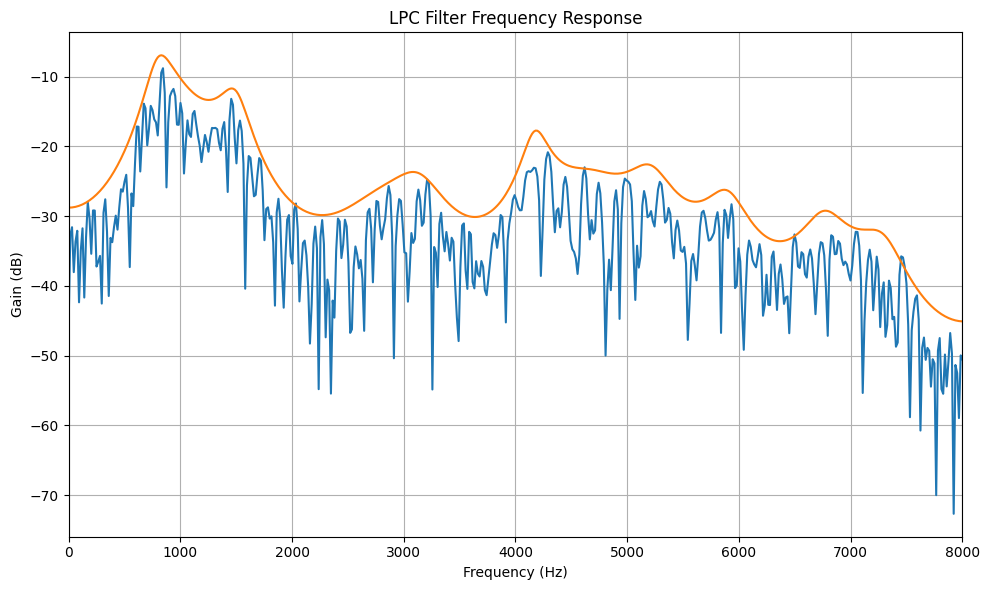

In [220]:
""" Filter의 Vocal Tract Response 추정해보기 """
## Plot LPC Spectrum
from utils import PlotLPCSpectrum

FE = FrameExtractor(yr, win_len=win_len, hop_len=hop_len)
frame_arr = FE.extract_frames(win_type="rectangular")
signal = frame_arr[15]

PlotLPCSpectrum(signal,sr=sr,p=25,dftlen=1024)

## LPC Filtered Signal Plot

[ 1.         -1.20959248  0.12192195 -0.09716879  0.11342301  0.03029061
  0.05818889  0.00614501  0.02484968  0.11241643 -0.11142798]


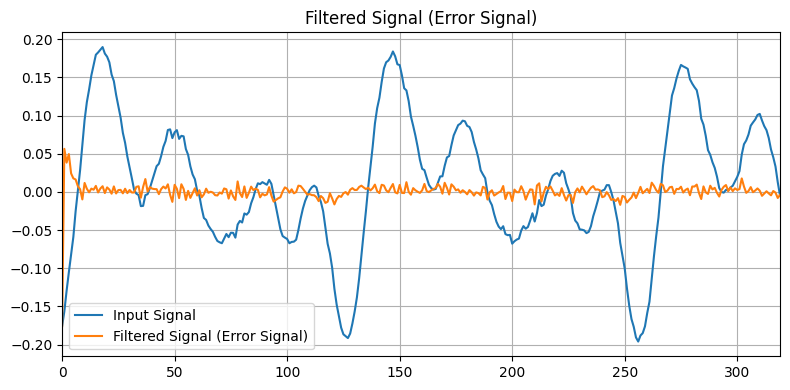

In [238]:
# """ Plot Error Signal """
# ## 주어진 input 신호와, 에러 신호를 그려봅시다
# ## Error 신호 그리기

# signal = frame_arr[30]
# order = 10

# # LPC Analysis
# coeff = LPC(signal, order=10)

# # Error 전달함수의 계수
# coeff_T = np.concatenate(([1],-coeff))
# # tt = lr.lpc(signal,order=order)
# # print(tt)
# print(coeff_T)

# filtered = lfilter(coeff_T,[1],signal)

# # 입력 신호와 에러 신호(필터링된 신호) 그리기
# plt.figure(figsize=(8, 4))

# # 입력 신호 플롯
# # plt.subplot(2, 1, 1)
# plt.plot(signal, label='Input Signal')
# plt.title('Input Signal')
# plt.grid(True)
# plt.xlim(0,len(signal)-1)
# plt.legend()

# # 에러 신호(필터링된 신호) 플롯
# # plt.subplot(2, 1, 2)
# plt.plot(filtered, label='Filtered Signal (Error Signal)')
# plt.title('Filtered Signal (Error Signal)')
# plt.grid(True)
# plt.legend()
# plt.xlim(0,len(signal)-1)
# plt.tight_layout()
# plt.show()


In [ ]:
# """
# Plot Error and LPC Filterd Signal
# """
# from scipy.signal import lfilter

# signal = frame_arr[30]
# # plt.plot(signal)
# # plt.show()
# ### Frame에서 진행하는 Pitch Detection

# ## 900Hz Lowpass Filering
# cutoff_freq = 900.0
# sr = 16000
# nyquist = 0.5 * sr
# num_taps = 101 # 필터의 길이

# #FIR LPF
# lpf_coeff = scipy.signal.firwin(num_taps, cutoff=cutoff_freq, fs=sr, pass_zero='lowpass', window="hamming")
# yr_lpf = scipy.signal.lfilter(lpf_coeff, 1.0, signal)

# plt.plot(yr_lpf)
# plt.show()

# ###################### 주파수 스펙트럼 plot
# filtered_signal = lfilter(lpf_coeff, 1.0, signal)

# # 주파수 스펙트럼 계산
# fft_original = np.fft.fft(signal)
# fft_filtered = np.fft.fft(filtered_signal)
# freq = np.fft.fftfreq(len(signal), 1/sr)

# # 주파수 스펙트럼 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(freq, np.abs(fft_original), label='Original Signal')
# plt.plot(freq, np.abs(fft_filtered), label='Filtered Signal', linestyle='--')
# plt.title('Frequency Spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, sr/2)  # Nyquist 주파수까지 표시
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.plot(signal)
# plt.plot(filtered_signal)
# plt.show()

In [235]:

# """
# 각 Frame의 AutoCorrelation 뜯어보는 코드
# Pitch Detection을 더 잘하기 위함
# """
# cutoff_freq = 900.0
# sr = 16000
# order = 10
# for signal in frame_arr[15:20]:
    
#     # signal = frame_arr[30]
#     ### Frame에서 진행하는 Pitch Detection

#     ## 900Hz Lowpass Filering
#     #FIR LPF
#     lpf_coeff = scipy.signal.firwin(numtaps=101, cutoff=cutoff_freq, fs=sr, pass_zero='lowpass', window="hamming")
#     signal_lpf = scipy.signal.lfilter(lpf_coeff, 1.0, signal)

#     # plt.plot(signal_lpf)
#     # plt.show()

#     ## Frame 에서 LPC 계수 계산하기
#     coeff = LPC(signal_lpf, order=order)
#     # print(coeff)

#     ## Clipping 적용하기
#     Clipper = ThresholdClipper(signal_lpf)
#     signal_clipped = Clipper.center_clip(Clipper.CL)

#     # AC 계산하기
#     ac_arr = auto_corr(signal_clipped)

#     # Enery
#     energy = ac_arr[0]
#     voice_thres = energy * 0.4

#     # Find Peaks of AC 
#     peakval = np.max(ac_arr)    
#     maxima_indices, _ = scipy.signal.find_peaks(ac_arr)
#     maxima_indices = maxima_indices[maxima_indices>50]
    
#     if maxima_indices.size > 0:
#         maxval = np.max([ac_arr[i] for i in maxima_indices])
#         idx = np.argmax([ac_arr[i] for i in maxima_indices])
#         max_idx = maxima_indices[idx]
#     else:   
#         maxval = 0
#     flag = 1 if maxval > voice_thres else 0
#     pitch_freq = sr / max_idx if flag else 0
    
#     print(pitch_freq)
#     plt.figure(figsize=(8,1))
#     plt.plot(ac_arr)
#     plt.show()

## Definitions
## LPF, SignalEnergy, PitchDetector, PitchContour

In [230]:

# Pitch Detector 함수 만들기
# voiced_flag : 1 if voiced, else 0
# pitch : pitch frequency if voiced, else 0
def LowPassFilter(signal, sr, cutoff=900):
    lpf_coeff = scipy.signal.firwin(numtaps=101, cutoff=900, fs=sr, pass_zero='lowpass', window="hamming")
    filtered = scipy.signal.lfilter(lpf_coeff, 1.0, signal)
    return filtered

def SignalEnergy(signal):
    return np.sum(np.abs(signal)**2)

""" 1개 frame 속에서 voiced / pitch 를 찾아주는 함수
    Use rectangular windows ! """
def PitchDetector(signal, sr=16000):
    # LPF to signal
    # signal = LowPassFilter(signal, sr, cutoff=900)
    ## Clipping 적용하기
    Clipper = ThresholdClipper(signal)
    signal_clipped = Clipper.center_clip(Clipper.CL)

    # AC 계산하기
    ac_arr = auto_corr(signal_clipped)

    # plt.plot(ac_arr)
    # plt.show()

    # Enery
    energy = ac_arr[0]
    voice_thres = energy * 0.35

    # Find Peaks of AC 
    peakval = np.max(ac_arr)    
    maxima_indices, _ = scipy.signal.find_peaks(ac_arr)
    maxima_indices = maxima_indices[maxima_indices>50]
    
    # print(maxima_indices)
    if maxima_indices.size > 0:
        maxval = np.max([ac_arr[i] for i in maxima_indices])
        idx = np.argmax([ac_arr[i] for i in maxima_indices])
        max_idx = maxima_indices[idx]
        # print(maxval, voice_thres)
        voiced_flag = 1 if maxval > voice_thres else 0
        pitch = sr / max_idx if voiced_flag else 0
        
    else:
        voiced_flag = 0
        pitch = 0

    return voiced_flag, pitch

""" 전체 signal을 넣고, 해당하는 pitch list (pitch contour)를 얻는다 """
def PitchContour(signal, win_len, hop_len, sr, plotopt=True):
    FE = FrameExtractor(signal,win_len,hop_len)
    frame_arr = FE.extract_frames(win_type="rectangular")
    
    pitchlist = []
    for framesignal in frame_arr:
        voiced_flag, pitch = PitchDetector(framesignal,sr=sr)
        pitchlist.append(pitch)
    
    # Median Filtering
    pitchlist = scipy.signal.medfilt(pitchlist, kernel_size=5)
    
    if plotopt:
        plt.figure(figsize=(15,6))
        plt.subplot(2,1,1)
        plt.plot(pitchlist)
        plt.subplot(2,1,2)
        plt.plot(signal)
        plt.show()
    return pitchlist

# SYNTHESIZE

## Definition
## LPF and Synthesis

In [247]:
"""
Definition of Frame Synthesis
"""
## input 으로 frame을 받아, 해당 frame을 반환해보자
def Synthesis(signal, sr, pitch, p=10, plotopt = False, n=0, prev_is_voiced=0, prev_indarr=[]):
    #######################################################
    window = lr.filters.get_window("hann",Nx=len(signal))
    
    signal = signal * window
    energy = SignalEnergy(signal)
    hop_len = len(window) // 2
    
    # LPC in the Frame
    coeff = LPC(signal, order=p)
    lpc_coeff = np.concatenate(([1],-coeff))

    indarr = []
    impulse_train = np.zeros(len(signal))
    # Voiced Signals
    if pitch: 
        # 이전 frame이 voiced 인지 여부에 따라 impulse 시작점을 결정함
        current_is_voiced = 1
        samples_per_impulse = int(sr/pitch)
        
        if prev_is_voiced :
            # Voiced -> Voiced
            # 이전 index의 정보를 토대로 새로운 index를 구축함
            ## 90 190 290 있으면 제일 작도록 hop_len을 뺌
            for ind in prev_indarr:
                startind = ind - hop_len
                if startind > 0:
                    for i in range(startind,startind+len(signal), samples_per_impulse):
                        if i < len(signal):
                            indarr.append(i)
                    break
            # print(indarr, "pitch: {}".format(samples_per_impulse))
        else : 
            # Unvoiced -> Voiced 전환된 지점 
            startind = 0
            for i in range(0,len(signal), samples_per_impulse):
                if i+n < len(signal):
                    indarr.append(i+n)
            # print(indarr, "pitch: {}".format(samples_per_impulse))

        for ind in indarr:
            impulse_train[ind]=1

        tempsum = np.sum(-lpc_coeff[1:p+1] * auto_corr(signal)[1:p+1])
        gain = np.sqrt(energy - tempsum) 
        # gain = 1
        
        # plt.plot(impulse_train)
        # plt.show()

        # LPC 필터를 사용한 신호 합성
        synthesized_signal = scipy.signal.lfilter([gain], lpc_coeff, impulse_train)        

    else : # Unvoiced
        current_is_voiced = 0
        sig_std = np.std(signal)
        excitation = np.random.normal(loc=0.0, scale = sig_std, size = signal.shape)
        
        F_excitation = np.fft.fft(excitation, len(signal))
        gain = np.sqrt(energy / SignalEnergy(excitation)) 
        # gain = 1
        
        w, h = scipy.signal.freqz([gain],lpc_coeff,worN=len(signal),whole=True, fs=sr)
        F_result = F_excitation*h
        synthesized_signal = np.fft.ifft(F_result, len(signal))
        synthesized_signal = np.real(synthesized_signal)
        
    # synthesized_signal = scipy.signal.lfilter([1],lpc_coeff,F_excitation)
    
    if plotopt:
        plt.figure(figsize=(15,3))
        plt.subplot(1,2,1)
        plt.plot(synthesized_signal)
        plt.title("Synthesized Signal with LPC")

        # print(coeff)
        # filtered = lfilter(coeff,[1],signal)
        plt.subplot(1,2,2)
        plt.plot(signal)
        plt.title("Frame")
        plt.show()
        
    return synthesized_signal, current_is_voiced, indarr

rectangular
From 18000 samples, total 111 frames are generated
rectangular
From 18000 samples, total 111 frames are generated


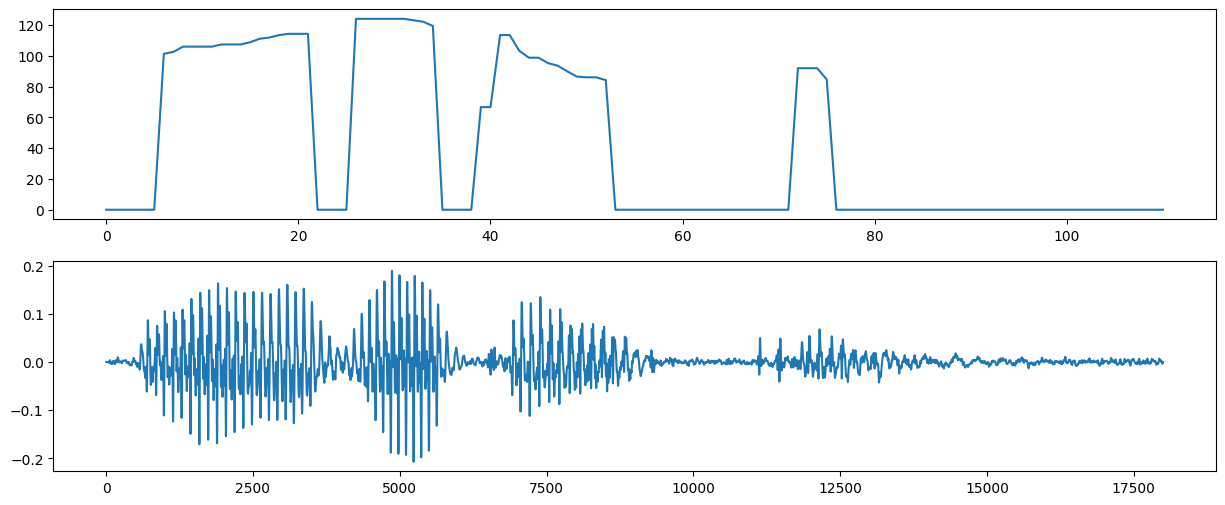

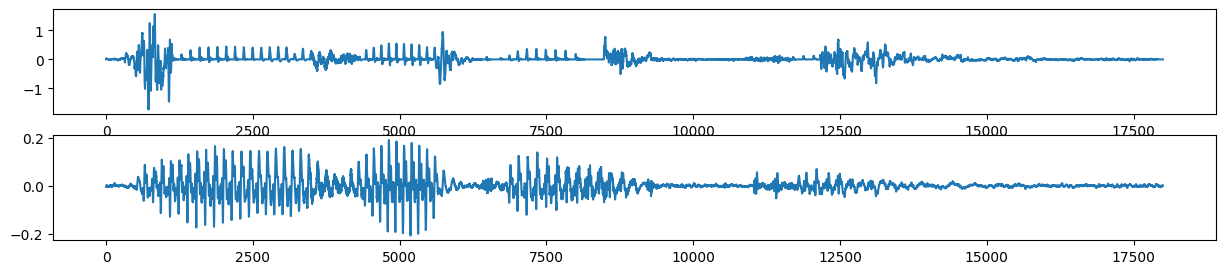

In [248]:
def LPCSynthesis(signal, win_len, hop_len, order, sr, plotopt, n=50):

    FE = FrameExtractor(signal,win_len,hop_len)
    frame_arr = FE.extract_frames(win_type="rectangular")
    synthesized = np.zeros_like(signal)

    prev_is_voiced = 0
    indarr = []
    # Pitch 
    signal = LowPassFilter(signal, sr=sr, cutoff=900)
    pitchlist = PitchContour(signal, win_len=win_len, hop_len=hop_len, sr=sr)
    
    ## 20번 frame의 신호를 정확하게 reconstruct 해볼까요?


    for i, signal in enumerate(frame_arr[:]):
        tempsig = np.zeros_like(y)
        # print("num: {}".format(i))
        start = i * hop_len
        end = start + win_len
        tempsig[start:end], prev_is_voiced, indarr = Synthesis(signal, sr=sr, pitch=pitchlist[i],p=order, plotopt=plotopt, 
                                    n = n, prev_indarr=indarr, prev_is_voiced=prev_is_voiced)
        synthesized = synthesized + tempsig
        
        ## For Debugging
        # # print(i, prev_is_voiced, indarr)
        # if prev_is_voiced: 
        #     print("Frame : {}".format(i))

    plt.figure(figsize=(15,3))
    plt.subplot(2,1,1)
    plt.plot(synthesized)
    plt.subplot(2,1,2)
    plt.plot(y)
    plt.show()

    return synthesized

## SYNTHESIZE
""" MAIN! """
file_path = "sa0_new.wav"
file_path = "yonseicrop.wav"

y,__ = lr.load(file_path,sr=sr)
synthesized = LPCSynthesis(y,win_len=win_len,hop_len=hop_len, order=25, sr=sr, plotopt=False, n=0)

import IPython.display as ipd
ipd.Audio(synthesized, rate=sr,autoplay=True)
# save_path = "synthesized_impulse_spacing_nogainscale_yesLPF.wav"
# # # print(save_path)
# sf.write(save_path, synthesized, sr)

In [ ]:
# Load Data
import IPython.display as ipd
ipd.Audio(yr, rate=sr, autoplay=True)

# save_path = "synthesized.wav"
# # print(save_path)
# sf.write(save_path, synthesized, sr)